<h1>Importacion de librerias necesarias para el desarrollo del modelo</h1>

In [6]:
# Manipulacion de datos
import pandas as pd
import numpy as np

#Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocesamiento
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, Normalizer

#Estilo de las graficas
sns.set_style('whitegrid')

In [7]:
# Carga de datos
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [8]:
# Tamaño del dataset
df.shape

(32581, 12)

In [9]:
#informacion general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [10]:
#conteo de valores nulos
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
#Eliminar filas con valores nulos y verificar
df = df.dropna()
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [12]:
#conteo de valores unicos
df.nunique()

person_age                      57
person_income                 3835
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      728
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [13]:
#Estadisticos descriptivos para variables numericas
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [14]:
#Estadisticos descriptivos para variables categoricas
df.describe(include=['object'])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,28638,28638,28638,28638
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,14551,5704,9402,23535


In [15]:
#Verificar si hay valores duplicados
df.duplicated().sum()

137

In [16]:
#Eliminar valores duplicados
df.drop_duplicates(inplace=True)

In [17]:
#Verificar que se eliminaron los valores duplicados
df.shape

(28501, 12)

c:\Users\dgilr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


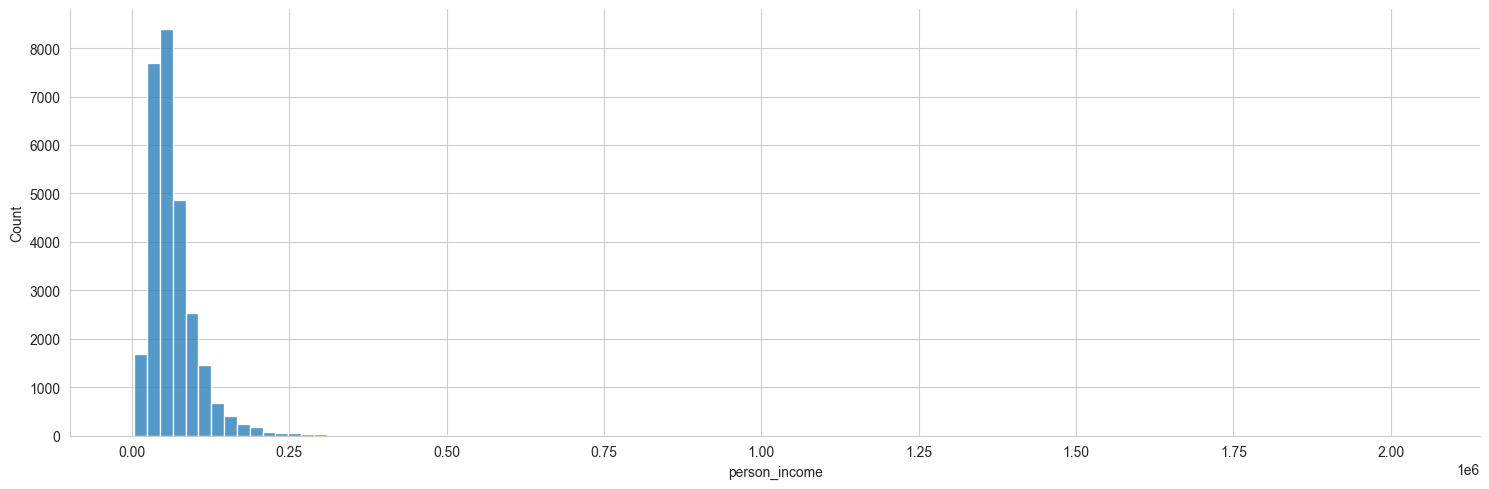

In [63]:
#Grafico de la variable person_income para ver su distribucion
sns.displot(df['person_income'], aspect=3, bins=100)
plt.show()

c:\Users\dgilr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


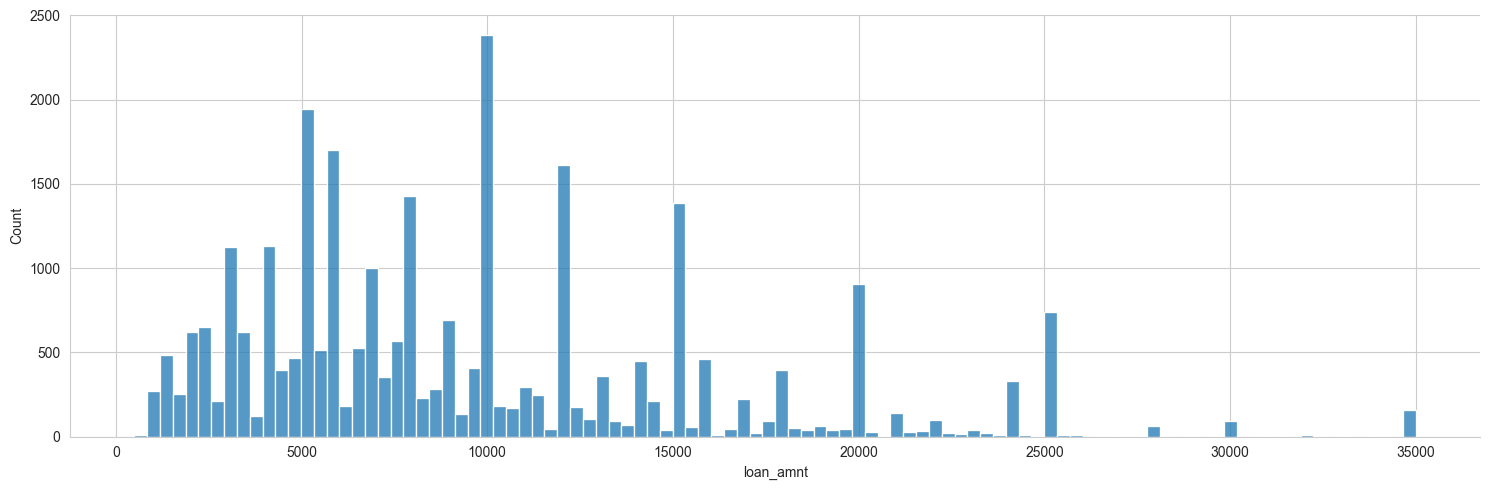

In [64]:
#Grafico de la variable loan_amnt para ver su distribucion
sns.displot(df['loan_amnt'], aspect=3, bins=100)
plt.show()

c:\Users\dgilr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


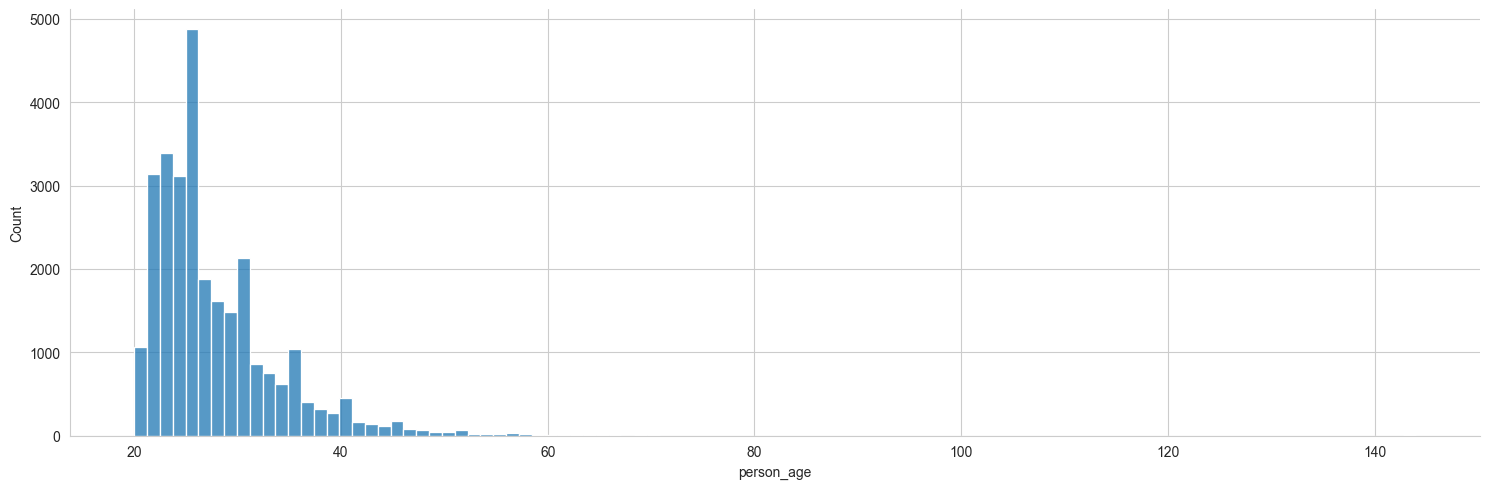

In [18]:
#Grafico de la variable person_age para ver su distribucion
sns.displot(df['person_age'], kde=False, bins=100, aspect=3)
plt.show()

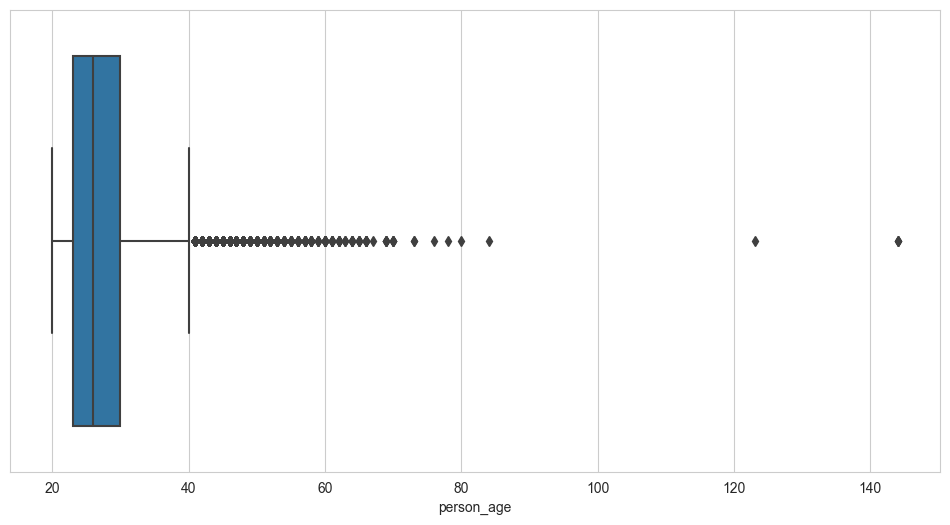

In [19]:
#Grafico de caja de la variable person_age para verificar outliers
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=df['person_age'])
plt.show()

### En el grafico no se observan datos erroneos relacionados con la edad (0 < o > 90 años). En la tabla relacionada a los estadisticos descriptivos se observa un valor maximo de 144 para la variable graficada lo cual es un valor incorrecto y que debe ser corregido. Ademas en el boxplot se puede verificar la existencia de datos outliers.

In [20]:
#Verificar cuantas entradas de la variable person_age son mayores a 100
df[df['person_age'] > 80]['person_age'].count()

5

In [21]:
#eliminar las entradas de la variable person_age mayores a 100
df = df[df['person_age'] <= 80]

### El mismo proceso se realiza para la variable person_emp_length

c:\Users\dgilr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


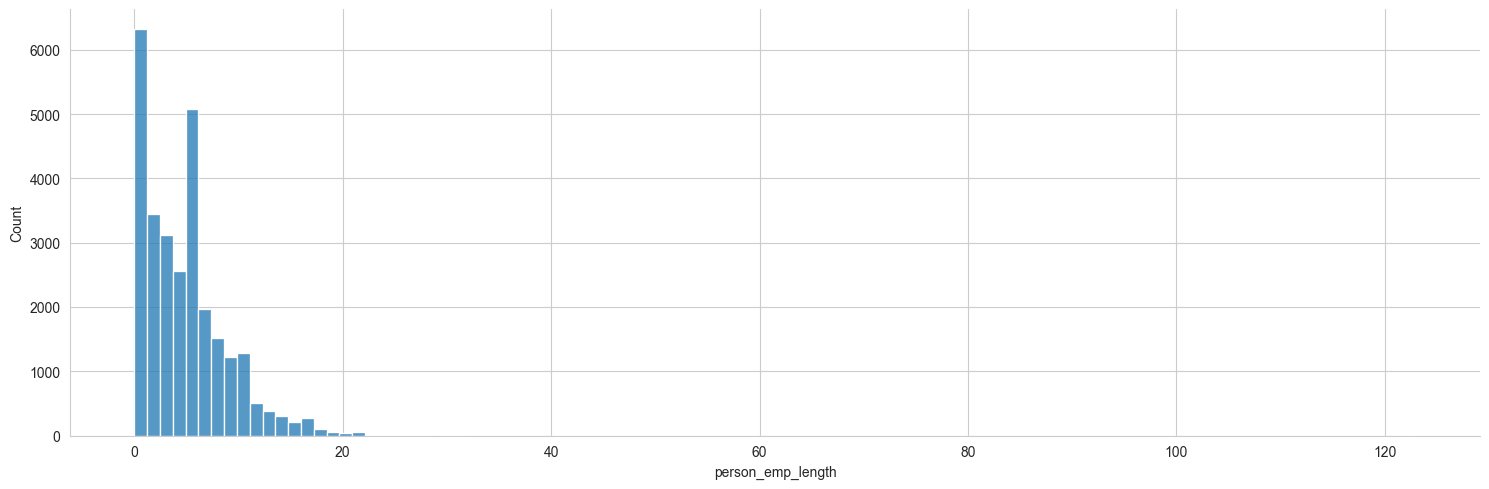

In [22]:
#Grafico de la variable person_emp_length para ver su distribucion
sns.displot(df['person_emp_length'], kde=False, bins=100, aspect=3)
plt.show()

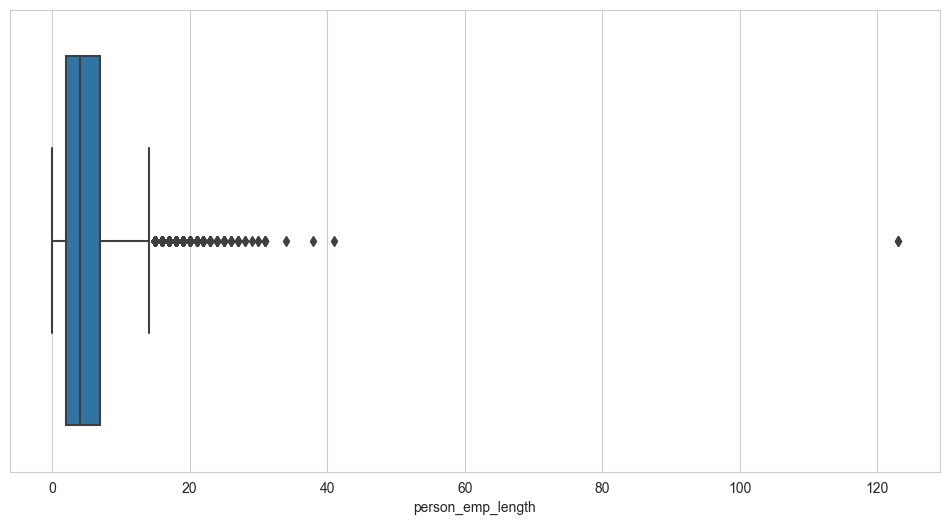

In [23]:
#Grafico de caja de la variable person_emp_lenght para verificar outliers
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=df['person_emp_length'])
plt.show()

### En el grafico no se observan datos erroneos relacionados con los años que el usuario ha trabajado (0 < o > 40 años). En la tabla relacionada a los estadisticos descriptivos se observa un valor maximo de 123 años para la variable graficada lo cual es un valor incorrecto y que debe ser corregido. Ademas en el boxplot se puede verificar la existencia de datos outliers.

In [24]:
#Verificar cuantas entradas de la variable person_emp_length son mayores a 40
df[df['person_emp_length'] > 40]['person_emp_length'].count()

3

In [25]:
#eliminar las entradas de la variable person_emp_length mayores a 40
df = df[df['person_emp_length'] <= 40]

### Luego de tratas con estos datos nulos observemos la correlacion existente entre las variables para tener una idea de cual de cuales tienen un aporte significativo

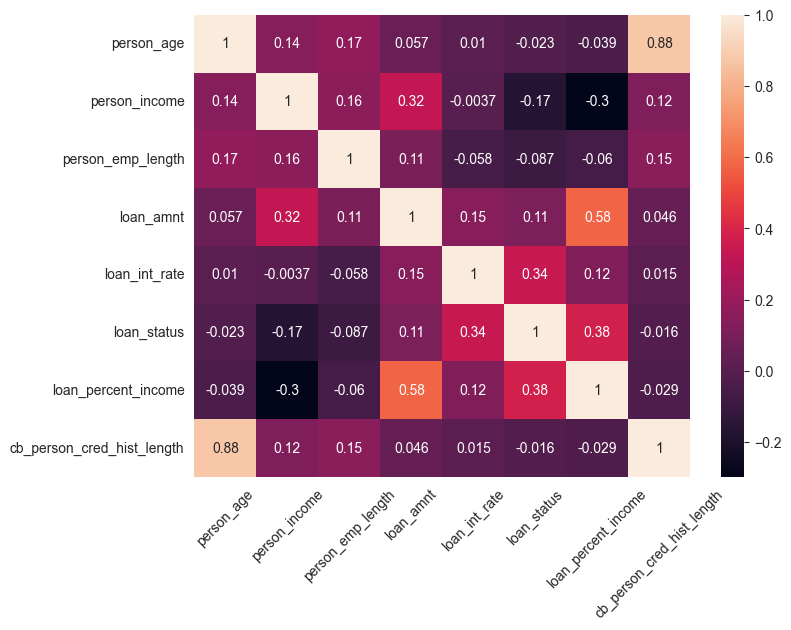

In [26]:
##Grafico de calor para ver la correlacion entre las variables numericas
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.xticks(rotation=45)
plt.show()

# Discretizacion de datos

### Se discretizaran las siguientes variables continuas (	person_age	person_income loan_amnt), agrupando sus valores en categorias especificas 

## Analisis de rangos

In [78]:
# analizar posibles rangos y cantidad de datos en cada rango para la columna person_age
def age_group(arr):
  for i in range(len(arr)-1):
    next_value = arr[i+1]
    values = df['person_age'].between(arr[i], next_value, inclusive='both').sum()
    print(f'cantidad de datos entre {arr[i]} y {arr[i+1]} = {values}')
age_group([20, 25, 35, 53, 80])

cantidad de datos entre 20 y 25 = 13389
cantidad de datos entre 25 y 35 = 14785
cantidad de datos entre 35 y 53 = 3408
cantidad de datos entre 53 y 80 = 181


In [71]:
# analizar posibles rangos y cantidad de datos en cada rango para la columna person_income
valor_max = df['person_income'].max()
valor_min = df['person_income'].min()

def income_group(arr):
  for i in range(len(arr)-1):
    next_value = arr[i+1]
    values = df['person_income'].between(arr[i], next_value, inclusive='both').sum()
    print(f'cantidad de datos entre {arr[i]} y {arr[i+1]} = {values}')
    
income_group([valor_min, 30000, 50000, 70000, 100000, valor_max])

cantidad de datos entre 4000 y 30000 = 3728
cantidad de datos entre 30000 y 50000 = 9101
cantidad de datos entre 50000 y 70000 = 7725
cantidad de datos entre 70000 y 100000 = 6087
cantidad de datos entre 100000 y 2039784 = 4051


In [74]:
#Analizar posibles rangos y cantidad de datos en cada rango para la columna loan_amnt
valor_max = df['loan_amnt'].max()
valor_min = df['loan_amnt'].min()
def loan_group(arr):
  for i in range(len(arr)-1):
    next_value = arr[i+1]
    values = df['loan_amnt'].between(arr[i], next_value, inclusive='both').sum()
    print(f'cantidad de datos entre {arr[i]} y {arr[i+1]} = {values}')
loan_group([valor_min, 5000, 10000, 15000, 20000, valor_max])

cantidad de datos entre 500 y 5000 = 8136
cantidad de datos entre 5000 y 10000 = 12332
cantidad de datos entre 10000 y 15000 = 7719
cantidad de datos entre 15000 y 20000 = 3826
cantidad de datos entre 20000 y 35000 = 2800


## Creacion de nuevas variables

In [ ]:
df['age_group'] = pd.cut(df['person_age'], bins=[20, 25, 30, 35, 80], labels=['20-25', '25-30', '30-35', '35-80'])

# Manejo de datos categoricos

### Se procede a convertir las variables categoricas en numericas para ser aceptadas por el modelo, unas se hacen mediante target dummy (datos nominales) y otras se establecen los valores en la misma columna (datos ordinales). Ejemplo: 

<div>
  <table style="margin: 0 auto;">
    <tr>
      <th>Variable_Categorica</th>
      <th>Variable_Numerica</th>
    </tr>
    <tr>
      <td>A</td>
      <td>0</td>
    </tr>
    <tr>
      <td>B</td>
      <td>1</td>
    </tr>
    <tr>
      <td>C</td>
      <td>2</td>
    </tr>
    <tr>
      <td>D</td>
      <td>3</td>
    </tr>
    <tr>
      <td>E</td>
      <td>4</td>
    </tr>
  </table>
</div>

## Datos Ordinales:

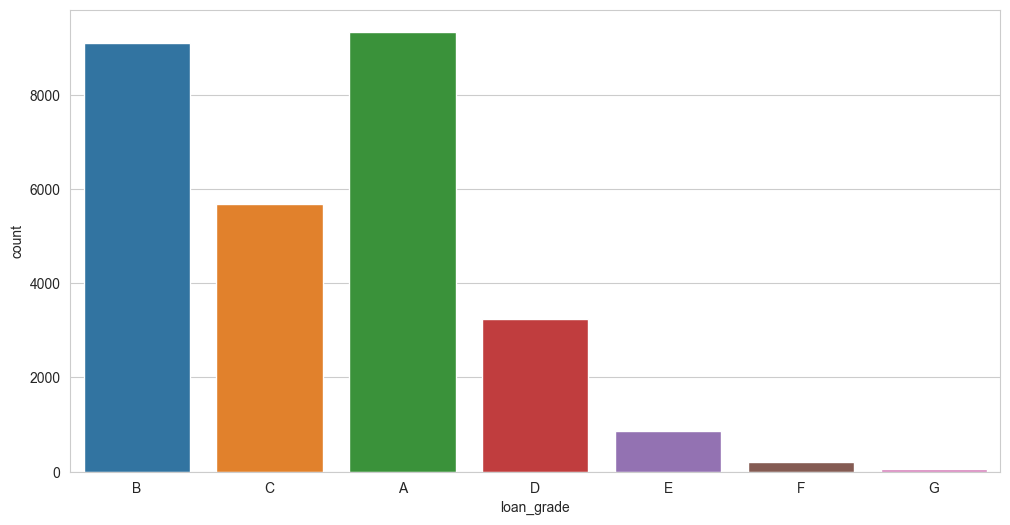

In [ ]:
#Grafico de la variable loan_grade para ver el conteo de cada categoria
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='loan_grade')
plt.show()

## NOTA: Preguntar acerca de esta codificacion, ya que con esto asumimos que A es mejor que B, y B es mejor que C y se encuentran equi distantes entre si 

In [ ]:
#convertir variable categorica loan_grade a numerica
df['loan_grade'].replace(to_replace=['A', 'B', 'C', 'D', 'E', 'F', 'G'], value=[6, 5, 4, 3, 2, 1, 0], inplace=True)

In [ ]:
#verificar que se convirtio la variable loan_grade a numerica
df['loan_grade'].dtype

dtype('int64')

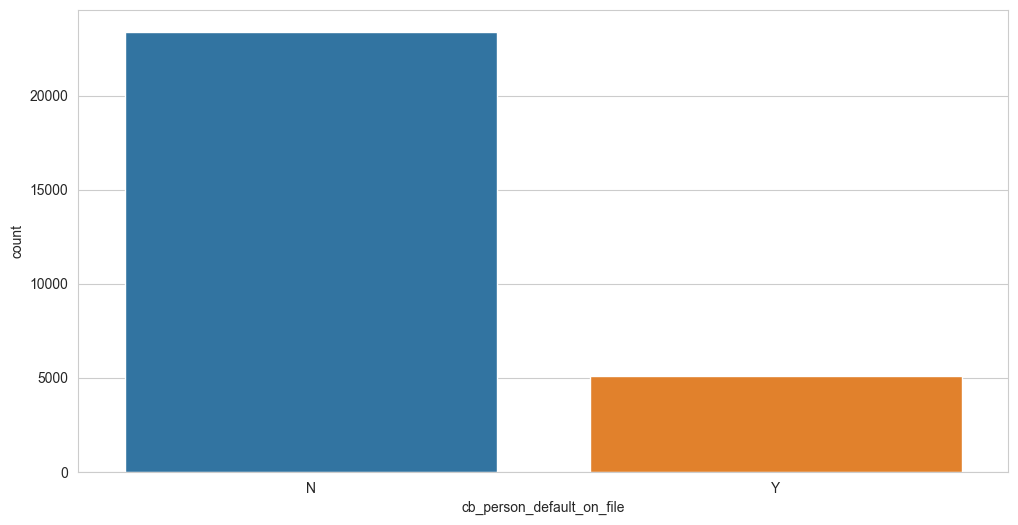

In [ ]:
#Grafico de la variable cb_person_default_on_file para ver el conteo de cada categoria
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='cb_person_default_on_file')
plt.show()

In [ ]:
#convertir variable categorica cb_person_default_on_file a numerica
df['cb_person_default_on_file'].replace(to_replace=['Y', 'N'], value=[1, 0], inplace=True)

In [ ]:
#verificar que se convirtio la variable cb_person_default_on_file a numerica
df['cb_person_default_on_file'].dtype

dtype('int64')

In [ ]:
#Ver contenido del dataset con estas modificaciones
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,5,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,4,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,4,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,4,35000,14.27,1,0.55,1,4
5,21,9900,OWN,2.0,VENTURE,6,2500,7.14,1,0.25,0,2


## Datos nominales

person_home_ownership
loan_intent

In [ ]:
#Crear codificacion nominal para las variables person_home_ownership, loan_intent
codificador = OneHotEncoder(sparse_output=False)
codificador.fit_transform(df[['person_home_ownership', 'loan_intent']])

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
#Crear dataframe con las variables codificadas
df_codificado = pd.DataFrame(codificador.fit_transform(df[['person_home_ownership', 'loan_intent']]), columns=np.concatenate(codificador.categories_))
df_codificado.head()

,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Unir el dataframe codificado con el dataframe original y eliminar las variables person_home_ownership, loan_intent
df = pd.concat([df, df_codificado], axis=1)
df.drop(['person_home_ownership', 'loan_intent'], axis=1, inplace=True)
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
1,21.0,9600.0,5.0,5.0,1000.0,11.14,0.0,0.10,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,25.0,9600.0,1.0,4.0,5500.0,12.87,1.0,0.57,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23.0,65500.0,4.0,4.0,35000.0,15.23,1.0,0.53,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,54400.0,8.0,4.0,35000.0,14.27,1.0,0.55,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,21.0,9900.0,2.0,6.0,2500.0,7.14,1.0,0.25,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Analisis de la variable objetivo
df['loan_status'].value_counts()

loan_status
0.0    22306
1.0     6187
Name: count, dtype: int64